# Customer Churn Prediction: Exploratory Data Analysis

This notebook performs exploratory data analysis on our preprocessed customer dataset. We'll visualize various aspects of the data to gain insights into customer behavior and potential predictors of churn.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_theme(style='whitegrid')
sns.set_palette("deep")

# Load the preprocessed data
df = pd.read_csv('../data/processed/processed_customer_data.csv')


print(df.head())
print(df.info())

   CustomerID  Age SubscriptionStart SubscriptionEnd Churn  TotalPurchases  \
0        1001   32        2023-01-15      2024-01-14    No              18   
1        1002   45        2023-02-01      2023-08-01   Yes               5   
2        1003   28        2023-03-10      2024-03-09    No              25   
3        1004   55        2023-01-01      2023-12-31   Yes              12   
4        1005   39        2023-04-05      2024-04-04    No              30   

  LastPurchaseDate  AvgOrderValue LoginFrequency  SupportInteractions  ...  \
0       2024-09-10          75.50          Daily                    2  ...   
1       2023-07-15         120.00         Weekly                    1  ...   
2       2024-09-20          50.25          Daily                    0  ...   
3       2023-11-30          85.75        Monthly                    4  ...   
4       2024-09-18          95.00          Daily                    1  ...   

   Location_St. Paul  Location_St. Petersburg  Location_Stockt

## 1. Distribution of Target Variable (Churn)

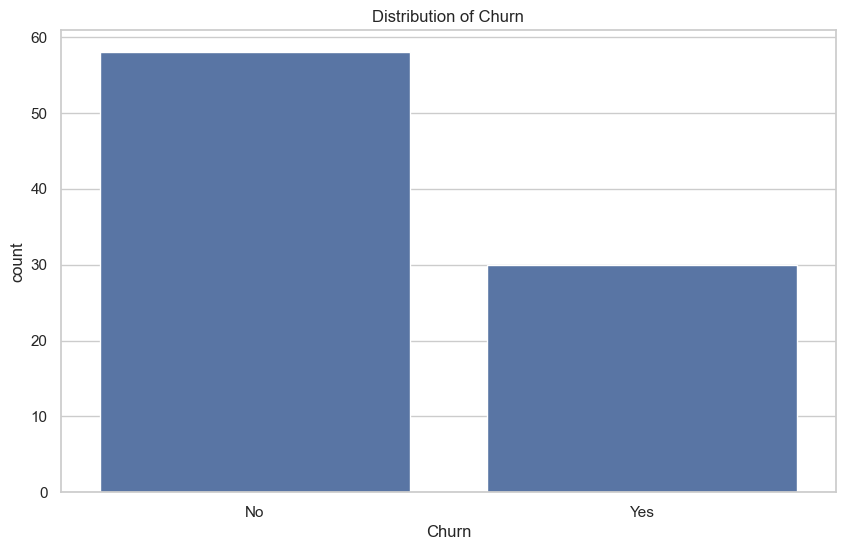

Churn Rate: 34.09%


In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True)
print(f"Churn Rate: {churn_rate['Yes']:.2%}")

## 2. Age Distribution

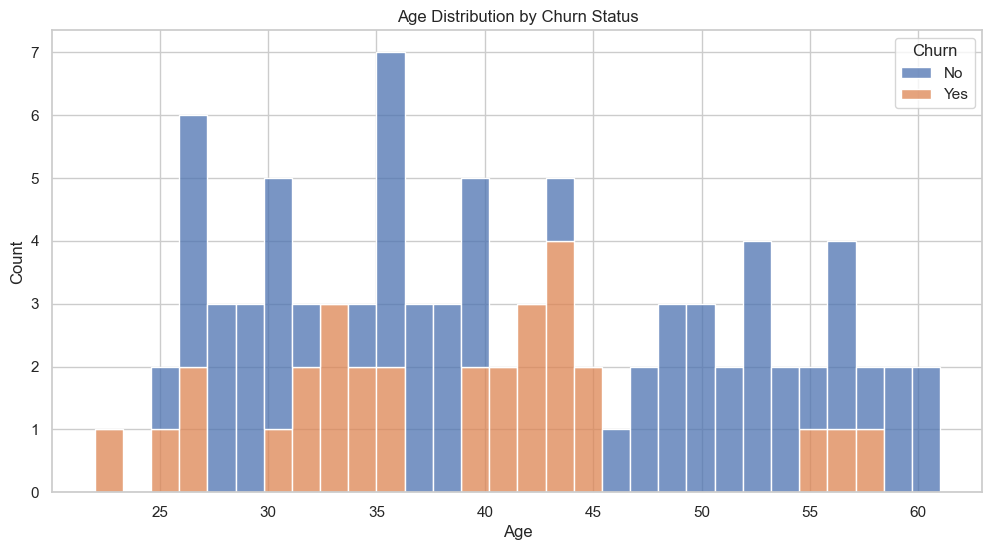

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Churn', multiple='stack', bins=30)
plt.title('Age Distribution by Churn Status')
plt.show()

   - Non-Churned Customers: Average age is 41.93 years, with a wider age range (25 to 61).
   - Churned Customers: Average age is 38.47 years, slightly younger, with ages ranging from 22 to 58.
   - Observation: Churned customers tend to be younger on average compared to non-churned customers.

## 3. Tenure Analysis

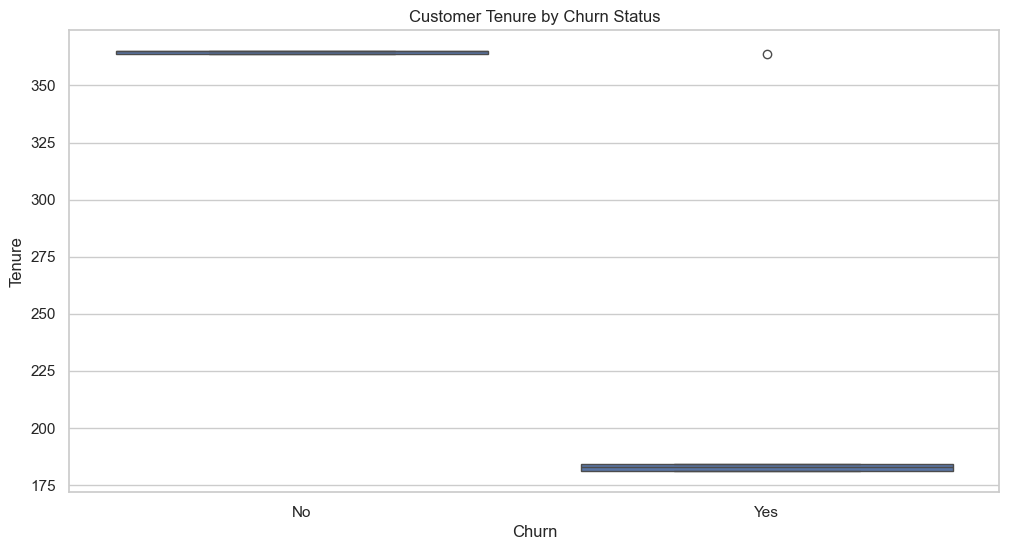

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Customer Tenure by Churn Status')
plt.show()

   - Non-Churned Customers: Average tenure is around **12.16 months**.
   - Churned Customers: Average tenure is significantly lower at **6.28 months**.
   - Observation: Longer tenure correlates with lower churn, indicating that customers who stay longer are less likely to churn.

## 4. Total Purchases vs Churn

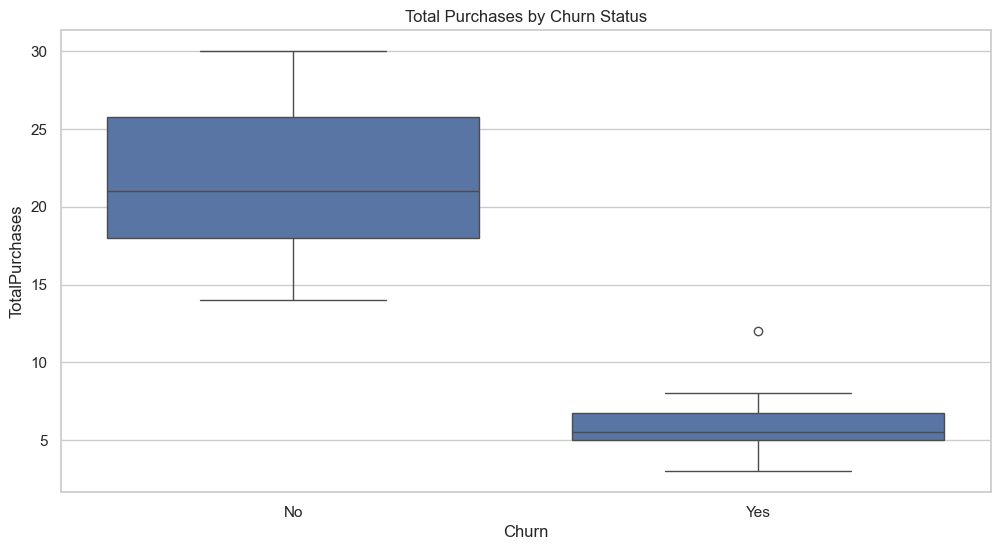

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='TotalPurchases', data=df)
plt.title('Total Purchases by Churn Status')
plt.show()

   - Non-Churned Customers: Average total purchases is **21.26**.
   - Churned Customers: Average total purchases is significantly lower at **5.70**.
   - Observation: Customers with more purchases are much less likely to churn, indicating a strong relationship between purchase behavior and churn.

## 5. Login Frequency vs Churn

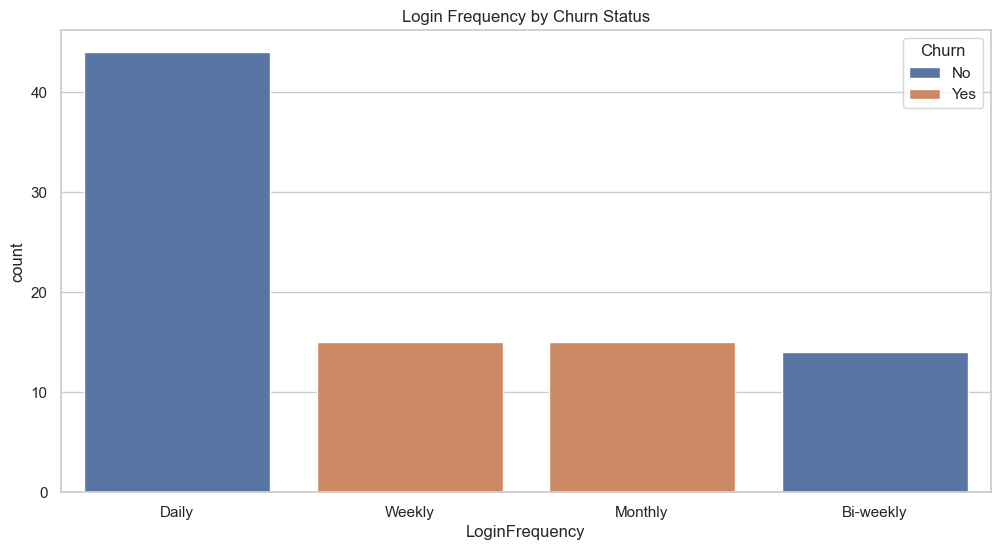

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='LoginFrequency', hue='Churn', data=df)
plt.title('Login Frequency by Churn Status')
plt.show()

   - Daily/Bi-weekly Login: Only seen in non-churned customers.
   - Weekly/Monthly Login: Primarily seen in churned customers (50% each).
   - Observation: More frequent logins (daily or bi-weekly) seem to be associated with lower churn, while less frequent logins (weekly or monthly) are linked to higher churn rates.

## 6. Correlation Heatmap

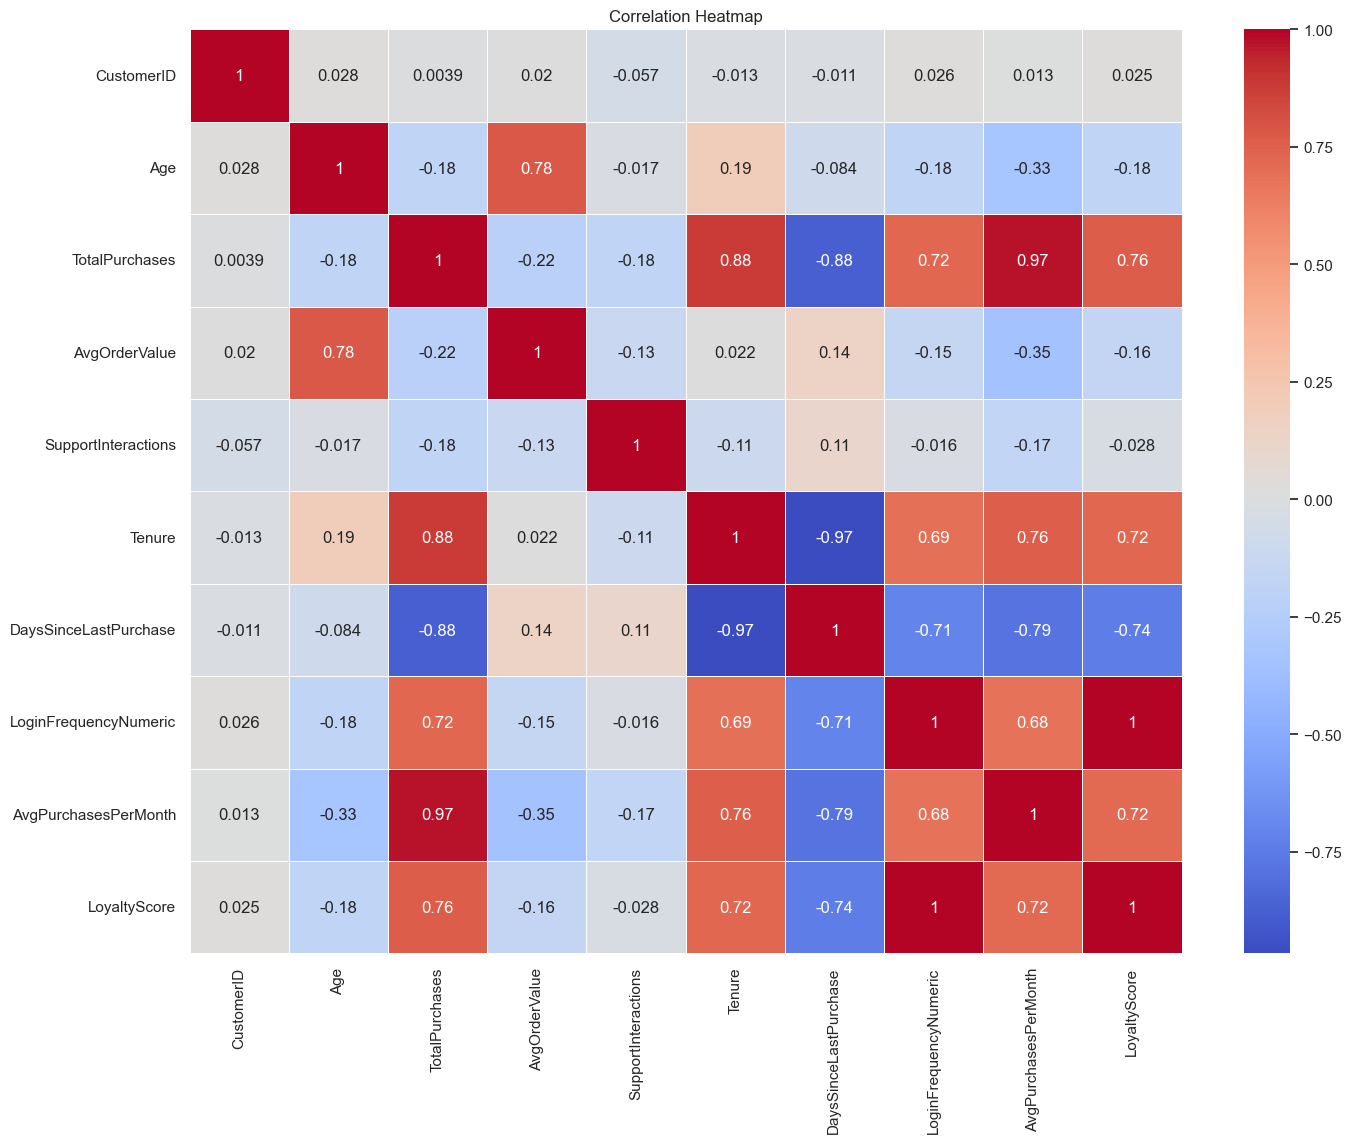

In [8]:
plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

   - Tenure and Churn: Strong negative correlation (-0.97), indicating that longer tenure leads to lower churn.
   - Total Purchases and Churn: Negative correlation (-0.88), showing that higher total purchases are strongly linked to lower churn.
   - Support Interactions and Churn: Positive correlation (0.17), suggesting that higher support interactions slightly increase churn likelihood.

## 7. Support Interactions vs Churn

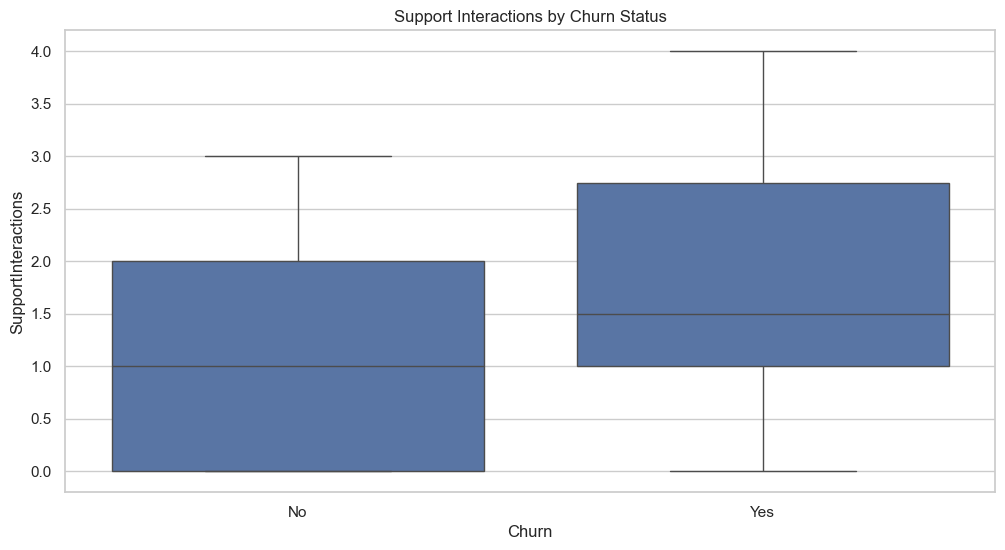

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='SupportInteractions', data=df)
plt.title('Support Interactions by Churn Status')
plt.show()

   - Non-Churned Customers: Average support interactions is 1.22.
   - Churned Customers: Average support interactions is 1.60.
   - Observation: Churned customers have slightly more support interactions, which could indicate dissatisfaction or unresolved issues.

## 8. Loyalty Score Analysis

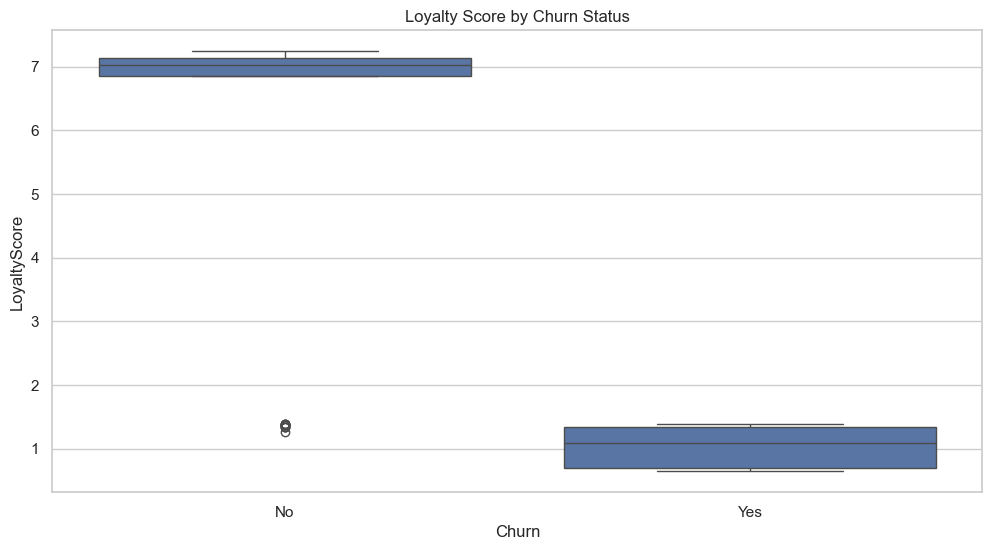

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='LoyaltyScore', data=df)
plt.title('Loyalty Score by Churn Status')
plt.show()

   - Non-Churned Customers: Average total purchases (as a proxy for loyalty) is 21.26.
   - Churned Customers: Average total purchases is only 5.70.
   - Observation: Higher total purchases indicate greater loyalty, with loyal customers being much less likely to churn.

## Summary of EDA Findings

1. **Churn Rate**:
   - No Churn: 65.91%
   - Churn: 34.09%

2. **Age Distribution**:
   - Non-Churned Customers: Average age is 41.93 years, with a wider age range (25 to 61).
   - Churned Customers: Average age is 38.47 years, slightly younger, with ages ranging from 22 to 58.
   - Observation: Churned customers tend to be younger on average compared to non-churned customers.

3. **Tenure**:
   - Non-Churned Customers: Average tenure is around **12.16 months**.
   - Churned Customers: Average tenure is significantly lower at **6.28 months**.
   - Observation: Longer tenure correlates with lower churn, indicating that customers who stay longer are less likely to churn.

4. **Total Purchases**:
   - Non-Churned Customers: Average total purchases is **21.26**.
   - Churned Customers: Average total purchases is significantly lower at **5.70**.
   - Observation: Customers with more purchases are much less likely to churn, indicating a strong relationship between purchase behavior and churn.

5. **Login Frequency**:
   - Daily/Bi-weekly Login: Only seen in non-churned customers.
   - Weekly/Monthly Login: Primarily seen in churned customers (50% each).
   - Observation: More frequent logins (daily or bi-weekly) seem to be associated with lower churn, while less frequent logins (weekly or monthly) are linked to higher churn rates.

6. **Correlations**:
   - Tenure and Churn: Strong negative correlation (-0.97), indicating that longer tenure leads to lower churn.
   - Total Purchases and Churn: Negative correlation (-0.88), showing that higher total purchases are strongly linked to lower churn.
   - Support Interactions and Churn: Positive correlation (0.17), suggesting that higher support interactions slightly increase churn likelihood.

7. **Support Interactions**:
   - Non-Churned Customers: Average support interactions is 1.22.
   - Churned Customers: Average support interactions is 1.60.
   - Observation: Churned customers have slightly more support interactions, which could indicate dissatisfaction or unresolved issues.

8. **Loyalty Score (Total Purchases)**:
   - Non-Churned Customers: Average total purchases (as a proxy for loyalty) is 21.26.
   - Churned Customers: Average total purchases is only 5.70.
   - Observation: Higher total purchases indicate greater loyalty, with loyal customers being much less likely to churn.

These insights will guide our feature selection and model building process in the next notebook.